# MA3K7 Assignment 2

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt

In [2]:
#first, lets build our matricies for visualisation using *s
size = 5
strs = ["*" for x in range(size**2)]
A = np.array(strs)
#print(A)
x = A.reshape(5,5)
x

array([['*', '*', '*', '*', '*'],
       ['*', '*', '*', '*', '*'],
       ['*', '*', '*', '*', '*'],
       ['*', '*', '*', '*', '*'],
       ['*', '*', '*', '*', '*']], dtype='<U1')

In [3]:
#and we can update our values during the game:
x[0,0] = 0
print(x)

[['0' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']]


First iteration of building our game, we want to play a game against a random bot, either player should be able to begin, any size should work, pictures displayed, and we should have a basic check that columns and rows are in range and the space isnt already taken

In [4]:
#Now lets start to build up our game - basic setup first
size = 3 #change depending on what size matrix you want to play <----
HUMAN = 0  
BOT = 1
strs = ["*" for x in range(size**2)]
B = np.zeros(size**2)
A = np.array(strs)
X_calculate = B.reshape(size,size)
X_pic = A.reshape(size,size)
print(X_pic)
#print(X_calculate)


  
def check_entry(i,j): #checks entry is within size of matrix and that space isnt full
    if 1<= i <= size and 1<= j <= size:
        if X_pic[i-1,j-1] == '*':
            return i,j
        else:
            i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
            j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
            return check_entry(i,j)
    else:
        i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
        j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
        
        return check_entry(i,j)

    
#need a function to check when game is complete
def check_complete():
    for i in range(size):
        for j in range(size):
            if X_pic[i-1,j-1] == '*':
                return 0
    return 1

    
positions_remaining = [[i,j] for i in range(size) for j in range(size)] #tracks positions remaining for bot to choose randomly from
def game(player):
    global positions_remaining 
    #print(positions_remaining)
    global X_pic
    global X_calculate
    
    if player == HUMAN:
        i = int(input("What row would you like to enter?"))
        j = int(input("What column would you like to enter?")) #allow inputs
        
        row, column = check_entry(i, j)
        positions_remaining.remove([row-1,column-1]) #update positions 
        X_pic[row-1,column-1]=0 #update picture
        X_calculate[row-1,column-1]=0 #for calculations
        print(X_pic)
        #print(X_calculate)
            
        if check_complete() == 1: #when check is complete, check if determinant is zero
            if np.abs(np.linalg.det(X_calculate))<0.0001: #accounts for machine epsilon
                
                print("You win!")
                
            else:
                print("Bot Wins!")
            return 0
        else:
            game(BOT)
            
    if player == BOT: #bot should choose random position from "positions remaining"
        
        point = np.random.randint(0,len(positions_remaining))
        bot_position = (positions_remaining[point])
        #print(bot_position)
        row, column = bot_position
        positions_remaining.remove([row,column])
        X_pic[row, column] = 1
        X_calculate[row, column] = 1
        print(f"Bot chooses row {row+1} and column {column+1}") 
        print(X_pic)
        if check_complete() == 1:
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                print("You win!")
            else:
                print("Bot Wins!")
            return 0
        else:
            game(HUMAN)
        

    
game(BOT)



[['*' '*' '*']
 ['*' '*' '*']
 ['*' '*' '*']]
Bot chooses row 1 and column 2
[['*' '1' '*']
 ['*' '*' '*']
 ['*' '*' '*']]


What row would you like to enter? 5
What column would you like to enter? 5
Either not in range or taken. Give me a row between 1 and 3 inclusive. 1
Either not in range or taken. Give me a column between 1 and 3 inclusive. 1


[['0' '1' '*']
 ['*' '*' '*']
 ['*' '*' '*']]
Bot chooses row 3 and column 2
[['0' '1' '*']
 ['*' '*' '*']
 ['*' '1' '*']]


What row would you like to enter? 2
What column would you like to enter? 2


[['0' '1' '*']
 ['*' '0' '*']
 ['*' '1' '*']]
Bot chooses row 2 and column 1
[['0' '1' '*']
 ['1' '0' '*']
 ['*' '1' '*']]


What row would you like to enter? 3
What column would you like to enter? 2
Either not in range or taken. Give me a row between 1 and 3 inclusive. 3
Either not in range or taken. Give me a column between 1 and 3 inclusive. 3


[['0' '1' '*']
 ['1' '0' '*']
 ['*' '1' '0']]
Bot chooses row 2 and column 3
[['0' '1' '*']
 ['1' '0' '1']
 ['*' '1' '0']]


What row would you like to enter? 1
What column would you like to enter? 3


[['0' '1' '0']
 ['1' '0' '1']
 ['*' '1' '0']]
Bot chooses row 3 and column 1
[['0' '1' '0']
 ['1' '0' '1']
 ['1' '1' '0']]
Bot Wins!


Next I want to iterate on a strategy function to work for all $n \geq 4$ as in the theory, to test that our strategy works

In [5]:
#first, lets use a strategy for n even and bot playing 0s only and going second with adjacent columns matched (remember this is ok due to column swaps) 
def strategy(row, column):
    a=row
    #take in remaining positions and output the optimal row column pair 
    #for n even and >=4, and 0 going second 
    if column % 2 ==1:
        b = column+1
    if column % 2==0:
        b= column-1
        
    return a,b

    
size = 4
HUMAN = 0  
BOT = 1
strs = ["*" for x in range(size**2)]
B = np.zeros(size**2)
A = np.array(strs)
X_calculate = B.reshape(size,size)
X_pic = A.reshape(size,size)
print(X_pic)
#print(X_calculate)

    
def check_entry(i,j):
    if 1<= i <= size and 1<= j <= size:
        if X_pic[i-1,j-1] == '*':
            return i,j
        else:
            i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
            j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
            return check_entry(i,j)
    else:
        i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
        j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
        
        return check_entry(i,j)
    
#need a function to check when game is complete
def check_complete():
    for i in range(size):
        for j in range(size):
            if X_pic[i-1,j-1] == '*':
                return 0
    return 1

#HERE THE BOT WILL BE 0 AND GO SECOND AND HOPEFULLY ALWAYS WIN
    
positions_remaining = [[i,j] for i in range(size) for j in range(size)]
last_move = []
def game(player):
    global positions_remaining 
    #print(positions_remaining)
    global X_pic
    global X_calculate
    global last_move
    if player == HUMAN:
        i = int(input("What row would you like to enter?"))
        j = int(input("What column would you like to enter?"))
        
        row, column = check_entry(i, j)
        last_move.append([row,column])
        #print(last_move)
        positions_remaining.remove([row-1,column-1])
        X_pic[row-1,column-1]=1
        X_calculate[row-1,column-1]=1
        print(X_pic)
        #print(X_calculate)
            
        if check_complete() == 1:
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                
                print("Bot Wins!")
                
            else:
                print("You Win!")
            return 0
        else:
            game(BOT)
            
    if player == BOT:
        row = last_move[-1][0]
        #print(row)
        column = last_move[-1][1]
        row, column = strategy(row,column)
        #print(bot_position)
        #row, column = bot_position
        positions_remaining.remove([row-1,column-1])
        X_pic[row-1, column-1] = 0
        X_calculate[row-1, column-1] = 0
        
        print(f"Bot chooses row {row} and column {column}") 
        print(X_pic)
        
        if check_complete() == 1:
            
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                
                print("Bot Wins!")
                
            else:
                print("You Win!")
            return 0
        else:
            game(HUMAN)
        
    
    
game(HUMAN)
    

[['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '*']]


What row would you like to enter? 1
What column would you like to enter? 1


[['1' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '*']]
Bot chooses row 1 and column 2
[['1' '0' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '*']]


What row would you like to enter? 3
What column would you like to enter? 2


[['1' '0' '*' '*']
 ['*' '*' '*' '*']
 ['*' '1' '*' '*']
 ['*' '*' '*' '*']]
Bot chooses row 3 and column 1
[['1' '0' '*' '*']
 ['*' '*' '*' '*']
 ['0' '1' '*' '*']
 ['*' '*' '*' '*']]


What row would you like to enter? 3
What column would you like to enter? 2
Either not in range or taken. Give me a row between 1 and 4 inclusive. 5
Either not in range or taken. Give me a column between 1 and 4 inclusive. 6
Either not in range or taken. Give me a row between 1 and 4 inclusive. 2
Either not in range or taken. Give me a column between 1 and 4 inclusive. 1


[['1' '0' '*' '*']
 ['1' '*' '*' '*']
 ['0' '1' '*' '*']
 ['*' '*' '*' '*']]
Bot chooses row 2 and column 2
[['1' '0' '*' '*']
 ['1' '0' '*' '*']
 ['0' '1' '*' '*']
 ['*' '*' '*' '*']]


What row would you like to enter? 4
What column would you like to enter? 3


[['1' '0' '*' '*']
 ['1' '0' '*' '*']
 ['0' '1' '*' '*']
 ['*' '*' '1' '*']]
Bot chooses row 4 and column 4
[['1' '0' '*' '*']
 ['1' '0' '*' '*']
 ['0' '1' '*' '*']
 ['*' '*' '1' '0']]


What row would you like to enter? 3
What column would you like to enter? 4


[['1' '0' '*' '*']
 ['1' '0' '*' '*']
 ['0' '1' '*' '1']
 ['*' '*' '1' '0']]
Bot chooses row 3 and column 3
[['1' '0' '*' '*']
 ['1' '0' '*' '*']
 ['0' '1' '0' '1']
 ['*' '*' '1' '0']]


What row would you like to enter? 2
What column would you like to enter? 4


[['1' '0' '*' '*']
 ['1' '0' '*' '1']
 ['0' '1' '0' '1']
 ['*' '*' '1' '0']]
Bot chooses row 2 and column 3
[['1' '0' '*' '*']
 ['1' '0' '0' '1']
 ['0' '1' '0' '1']
 ['*' '*' '1' '0']]


What row would you like to enter? 4
What column would you like to enter? 1


[['1' '0' '*' '*']
 ['1' '0' '0' '1']
 ['0' '1' '0' '1']
 ['1' '*' '1' '0']]
Bot chooses row 4 and column 2
[['1' '0' '*' '*']
 ['1' '0' '0' '1']
 ['0' '1' '0' '1']
 ['1' '0' '1' '0']]


What row would you like to enter? 1
What column would you like to enter? 3


[['1' '0' '1' '*']
 ['1' '0' '0' '1']
 ['0' '1' '0' '1']
 ['1' '0' '1' '0']]
Bot chooses row 1 and column 4
[['1' '0' '1' '0']
 ['1' '0' '0' '1']
 ['0' '1' '0' '1']
 ['1' '0' '1' '0']]
Bot Wins!


Now lets run many simulations for this case, again feel free to change size to any positive n greater than or equal to 4 

In [6]:
def strategy(row, column):
    a=row
    #take in remaining positions and output the optimal row column pair 
    #for n even and >=4, and 0 going second 
    if column % 2 ==0:
        b = column+1
    if column % 2==1:
        b= column-1
        
    return a,b
        
    
    
    
size = 4
HUMAN = 0  
BOT = 1
strs = ["*" for x in range(size**2)]
B = np.zeros(size**2)
A = np.array(strs)
X_calculate = B.reshape(size,size)
X_pic = A.reshape(size,size)
#print(X_pic)
#print(X_calculate)

    
def check_entry(i,j):
    if 1<= i <= size and 1<= j <= size:
        if X_pic[i-1,j-1] == '*':
            return i,j
        else:
            i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
            j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
            return check_entry(i,j)
    else:
        i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
        j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
        
        return check_entry(i,j)
    
#need a function to check when game is complete
def check_complete():
    for i in range(size):
        for j in range(size):
            if X_pic[i-1,j-1] == '*':
                return 0
    return 1

#HERE THE BOT WILL BE 0 AND GO SECOND AND HOPEFULLY ALWAYS WIN

positions_remaining = [[i,j] for i in range(size) for j in range(size)]
last_move = []
def game_lite(player):
    global positions_remaining 
    #print(positions_remaining)
    global X_pic
    global X_calculate
    global last_move
    global counter
    if player == HUMAN:
    
        
        point = np.random.randint(0,len(positions_remaining))
        rand_position = (positions_remaining[point])
        #print(bot_position)
        row, column = rand_position
        last_move.append([row,column])
        positions_remaining.remove([row,column])
        X_pic[row, column] = 1
        X_calculate[row, column] = 1
        #print(X_pic)
        
        #print(X_calculate)
            
        if check_complete() == 1:
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                counter = counter
                #print("Bot Wins!")
                
            else:
                #print("You Win!")
                counter +=1
            return 0
        else:
            game_lite(BOT)
            
    if player == BOT:
        row = last_move[-1][0]
        #print(row)
        column = last_move[-1][1]
        row, column = strategy(row,column)
        #print(bot_position)
        #row, column = bot_position
        positions_remaining.remove([row,column])
        X_pic[row, column] = 0
        X_calculate[row, column] = 0
        
        #print(f"Bot chooses row {row} and column {column}") 
        #print(X_pic)
        
        if check_complete() == 1:
            
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                counter = counter
                #print("Bot Wins!")
                
            else:
                #print("You Win!")
                counter +=1
            return 0
        else:
            game_lite(HUMAN)
        
    
    
#game(HUMAN)
    
    

In [7]:
    
    
counter = 0  
trials = 10000
for i in range(trials):
    size = 6
    HUMAN = 0  
    BOT = 1
    strs = ["*" for x in range(size**2)]
    B = np.zeros(size**2)
    A = np.array(strs)
    X_calculate = B.reshape(size,size)
    X_pic = A.reshape(size,size)
    positions_remaining = [[i,j] for i in range(size) for j in range(size)]
    last_move = []
    game_lite(HUMAN)
print(counter)
print(f"Of {trials} trials, the optimal strategy on {size}x{size} beats random {(trials-counter)*100/trials} percent of the time")

0
Of 10000 trials, the optimal strategy on 6x6 beats random 100.0 percent of the time


In [8]:
#feel free to change above number of trials and "size" to see it always works

Now, iterating on our strategy algorithm to allow bot (as player 0) to go first, and were going to have the strategy bot to play against a random bot and print off the game without having to input each move

In [9]:
def strategy():
    #print(last_move)
    if len(last_move) == 0:
        point = np.random.randint(0,len(positions_remaining))
        rand_position = (positions_remaining[point])
        #print(bot_position)
        row, column = rand_position
        return row, column
    else:
        row = last_move[-1][0]
        column = last_move[-1][1]
        #print(row, column)
        
        #take in remaining positions and output the optimal row column pair 
        #for n even and >=4, and 0 going second 
        if column % 2 ==0:
            column = column+1
            #print(column)
            #print(X_pic)
            if X_pic[row,column] == "*":
                return row, column
            else:
                point = np.random.randint(0,len(positions_remaining))
                rand_position = (positions_remaining[point])
                #print(bot_position)
                row, column = rand_position
                return row, column

        if column % 2==1:
            column= column-1
            if X_pic[row,column] == "*":
                return row, column
            else:
                point = np.random.randint(0,len(positions_remaining))
                rand_position = (positions_remaining[point])
                #print(bot_position)
                row, column = rand_position

                return row, column

    
size = 4
HUMAN = 0  
BOT = 1
strs = ["*" for x in range(size**2)]
B = np.zeros(size**2)
A = np.array(strs)
X_calculate = B.reshape(size,size)
X_pic = A.reshape(size,size)
print(X_pic)
#print(X_calculate)

    
def check_entry(i,j):
    if 1<= i <= size and 1<= j <= size:
        if X_pic[i-1,j-1] == '*':
            return i,j
        else:
            i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
            j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
            return check_entry(i,j)
    else:
        i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
        j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
        
        return check_entry(i,j)
    
#need a function to check when game is complete
def check_complete():
    for i in range(size):
        for j in range(size):
            if X_pic[i-1,j-1] == '*':
                return 0
    return 1


positions_remaining = [[i,j] for i in range(size) for j in range(size)]
last_move = []
def game(player):
    global positions_remaining 
    #print(positions_remaining)
    global X_pic
    global X_calculate
    global last_move
    if player == HUMAN:
        
        point = np.random.randint(0,len(positions_remaining))
        rand_position = (positions_remaining[point])
        #print(bot_position)
        row, column = rand_position
        last_move.append([row,column])
        positions_remaining.remove([row,column])
        X_pic[row, column] = 1
        X_calculate[row, column] = 1
        print(f"Random player chooses row {row+1} and column {column+1}") 
        print(X_pic)
        
        #print(X_calculate)
            
        if check_complete() == 1:
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                
                print("Bot Wins!")
                
            else:
                print("You Win!")
            return 0
        else:
            game(BOT)
            
    if player == BOT:
        row, column = strategy()
        #row = last_move[-1][0]
        #print(row)
        #column = last_move[-1][1]
        #row, column = strategy(row,column)
        #print(bot_position)
        #row, column = bot_position
        positions_remaining.remove([row,column])
        X_pic[row, column] = 0
        X_calculate[row, column] = 0
        
        print(f"Bot chooses row {row+1} and column {column+1}") 
        print(X_pic)
        
        if check_complete() == 1:
            
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                
                print("Bot Wins!")
                
            else:
                print("You Win!")
            return 0
        else:
            game(HUMAN)
        
    
    
game(BOT)
    

[['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '*']]
Bot chooses row 3 and column 4
[['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '0']
 ['*' '*' '*' '*']]
Random player chooses row 4 and column 4
[['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '0']
 ['*' '*' '*' '1']]
Bot chooses row 4 and column 3
[['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '0']
 ['*' '*' '0' '1']]
Random player chooses row 4 and column 1
[['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '0']
 ['1' '*' '0' '1']]
Bot chooses row 4 and column 2
[['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '*' '*' '0']
 ['1' '0' '0' '1']]
Random player chooses row 3 and column 2
[['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['*' '1' '*' '0']
 ['1' '0' '0' '1']]
Bot chooses row 3 and column 1
[['*' '*' '*' '*']
 ['*' '*' '*' '*']
 ['0' '1' '*' '0']
 ['1' '0' '0' '1']]
Random player chooses row 2 and column 2
[['*' '*' '*' '*']
 ['*' '1' '*' '*']
 ['0' '1' '*' '0']
 ['1' '0' '0' '1']]
Bot chooses row 2 a

And now we can run many simulations of the bot going first and using our strategy for starting against a random bot

In [10]:
def strategy():
    #print(last_move)
    if len(last_move) == 0:
        point = np.random.randint(0,len(positions_remaining))
        rand_position = (positions_remaining[point])
        #print(bot_position)
        row, column = rand_position
        return row, column
    else:
        row = last_move[-1][0]
        column = last_move[-1][1]
        #print(row, column)
        
        #take in remaining positions and output the optimal row column pair 
        #for n even and >=4, and 0 going second 
        if column % 2 ==0:
            column = column+1
            #print(column)
            #print(X_pic)
            if X_pic[row,column] == "*":
                return row, column
            else:
                point = np.random.randint(0,len(positions_remaining))
                rand_position = (positions_remaining[point])
                #print(bot_position)
                row, column = rand_position
                return row, column

        if column % 2==1:
            column= column-1
            if X_pic[row,column] == "*":
                return row, column
            else:
                point = np.random.randint(0,len(positions_remaining))
                rand_position = (positions_remaining[point])
                #print(bot_position)
                row, column = rand_position

                return row, column

        
        
    
    
    
size = 6
HUMAN = 0  
BOT = 1
strs = ["*" for x in range(size**2)]
B = np.zeros(size**2)
A = np.array(strs)
X_calculate = B.reshape(size,size)
X_pic = A.reshape(size,size)
#print(X_pic)
#print(X_calculate)
    
#need a function to check when game is complete
def check_complete():
    for i in range(size):
        for j in range(size):
            if X_pic[i-1,j-1] == '*':
                return 0
    return 1

positions_remaining = [[i,j] for i in range(size) for j in range(size)]
last_move = []
def game_even_trials(player):
    global positions_remaining 
    #print(positions_remaining)
    global X_pic
    global X_calculate
    global last_move
    global counter
    
    if player == HUMAN:
        
        point = np.random.randint(0,len(positions_remaining))
        rand_position = (positions_remaining[point])
        #print(bot_position)
        row, column = rand_position
        last_move.append([row,column])
        positions_remaining.remove([row,column])
        X_pic[row, column] = 1
        X_calculate[row, column] = 1
        #print(f"Random player chooses row {row+1} and column {column+1}") 
        #print(X_pic)
        
        #print(X_calculate)
            
        if check_complete() == 1:
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                counter = counter
                #print("Bot Wins!")
                
            else:
                #print("You Win!")
                counter +=1
            return 0
        else:
            game_even_trials(BOT)
            
    if player == BOT:
        row, column = strategy()
        #row = last_move[-1][0]
        #print(row)
        #column = last_move[-1][1]
        #row, column = strategy(row,column)
        #print(bot_position)
        #row, column = bot_position
        positions_remaining.remove([row,column])
        X_pic[row, column] = 0
        X_calculate[row, column] = 0
        
        #print(f"Bot chooses row {row+1} and column {column+1}") 
        #print(X_pic)
        
        if check_complete() == 1:
            
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                
                #print("Bot Wins!")
                counter = counter
                
            else:
                #print("You Win!")
                counter +=1
            return 0
        else:
            game_even_trials(HUMAN)
        
    
    
game_even_trials(HUMAN)
    

In [11]:
size = 6
HUMAN = 0  
BOT = 1
counter = 0  
trials = 10000
for i in range(trials):
    strs = ["*" for x in range(size**2)]
    B = np.zeros(size**2)
    A = np.array(strs)
    X_calculate = B.reshape(size,size)
    X_pic = A.reshape(size,size)
    positions_remaining = [[i,j] for i in range(size) for j in range(size)]
    last_move = []
    counter = 0
    game_even_trials(BOT)
print(counter)
print(f"Of {trials} trials, the optimal strategy with player 0 beginning beats random play{(trials-counter)*100/trials} percent of the time")

0
Of 10000 trials, the optimal strategy with player 0 beginning beats random play100.0 percent of the time


In [12]:
#Which is what we hoped! Our strategy generalisation worked for n even and player 0 beginnning

And the last iteration we need is to allow for $n$ to be odd with our strategy and test it still wins every time

In [13]:
#note, in my proofs i used the "extra column" as the final column, for easier coding I have used the first column but this is fine using column swaps
def strategy():
    #print(last_move)
    if size % 2 ==0:
        if len(last_move) == 0:
            point = np.random.randint(0,len(positions_remaining))
            rand_position = (positions_remaining[point])
            #print(bot_position)
            row, column = rand_position
            return row, column
        else:
            row = last_move[-1][0]
            column = last_move[-1][1]
            #print(row, column)

            #take in remaining positions and output the optimal row column pair 
            #for n even and >=4, and 0 going second 
            if column % 2 ==0:
                column = column+1
                #print(column)
                #print(X_pic)
                if X_pic[row,column] == "*":
                    return row, column
                else:
                    point = np.random.randint(0,len(positions_remaining))
                    rand_position = (positions_remaining[point])
                    #print(bot_position)
                    row, column = rand_position
                    return row, column
            if column % 2 ==1:
                column = column-1
                #print(column)
                #print(X_pic)
                if X_pic[row,column] == "*":
                    return row, column
                else:
                    point = np.random.randint(0,len(positions_remaining))
                    rand_position = (positions_remaining[point])
                    #print(bot_position)
                    row, column = rand_position
                    return row, column
    else:
        if len(last_move) == 0:
            return 0, 0
        if last_move[-1][1] == 0: ##checks if last move was in column 1, if so take a random entry in column 1 unless its full, then go random
            if len(first_column_odd_remaining) == 0:
                point = np.random.randint(0,len(positions_remaining))
                rand_position = (positions_remaining[point])
                #print(bot_position)
                row, column = rand_position
                return row, column
            else:    
                point = np.random.randint(0,len(first_column_odd_remaining))
                rand_position = (first_column_odd_remaining[point])
                #print(bot_position)
                row = rand_position
                return row, 0
        else:
            row = last_move[-1][0]
            column = last_move[-1][1]
            #print(row, column)

            #take in remaining positions and output the optimal row column pair 
            #for n even and >=4, and 0 going second 
            if column % 2 ==1:
                column = column+1
                #print(column)
                #print(X_pic)
                if X_pic[row,column] == "*":
                    return row, column
                else:
                    point = np.random.randint(0,len(positions_remaining))
                    rand_position = (positions_remaining[point])
                    #print(bot_position)
                    row, column = rand_position
                    return row, column

            if column % 2==0:
                column= column-1
                if X_pic[row,column] == "*":
                    return row, column
                else:
                    point = np.random.randint(0,len(positions_remaining))
                    rand_position = (positions_remaining[point])
                    #print(bot_position)
                    row, column = rand_position

                    return row, column

        
        
    
    
    
size = 5
HUMAN = 0  
BOT = 1
strs = ["*" for x in range(size**2)]
B = np.zeros(size**2)
A = np.array(strs)
X_calculate = B.reshape(size,size)
X_pic = A.reshape(size,size)
print(X_pic)
#print(X_calculate)

    
def check_entry(i,j):
    if 1<= i <= size and 1<= j <= size:
        if X_pic[i-1,j-1] == '*':
            return i,j
        else:
            i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
            j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
            return check_entry(i,j)
    else:
        i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
        j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
        
        return check_entry(i,j)
    
#need a function to check when game is complete
def check_complete():
    for i in range(size):
        for j in range(size):
            if X_pic[i-1,j-1] == '*':
                return 0
    return 1

positions_remaining = [[i,j] for i in range(size) for j in range(size)]
first_column_odd_remaining = [i for i in range(size)]
#print(first_column_odd_remaining)
last_move = []
def game(player):
    global positions_remaining 
    #print(positions_remaining)
    global X_pic
    global X_calculate
    global last_move
    global first_column_odd_remaining
    if player == HUMAN:
        
        point = np.random.randint(0,len(positions_remaining))
        rand_position = (positions_remaining[point])
        #print(bot_position)
        row, column = rand_position
        if column == 0:    
            first_column_odd_remaining.remove(row)
        last_move.append([row,column])
        positions_remaining.remove([row,column])
        X_pic[row, column] = 1
        X_calculate[row, column] = 1
        print(f"Random player chooses row {row+1} and column {column+1}") 
        print(X_pic)
        
        #print(X_calculate)
            
        if check_complete() == 1:
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                
                print("Bot Wins!")
                
            else:
                print("You Win!")
            return 0
        else:
            game(BOT)
            
    if player == BOT:
        row, column = strategy()
        #row = last_move[-1][0]
        #print(row)
        #column = last_move[-1][1]
        #row, column = strategy(row,column)
        #print(bot_position)
        #row, column = bot_position
        positions_remaining.remove([row,column])
        if column == 0:    
            first_column_odd_remaining.remove(row)
        X_pic[row, column] = 0
        X_calculate[row, column] = 0
        
        print(f"Bot chooses row {row+1} and column {column+1}") 
        print(X_pic)
        
        if check_complete() == 1:
            
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                
                print("Bot Wins!")
                
            else:
                print("You Win!")
            return 0
        else:
            game(HUMAN)
        
    
    
game(BOT) #can run this setting size to any integer greater than or equal to 4
#and starting with strategic bot using game(BOT), or starting with random human with game(HUMAN) in this cell
#ofcourse BOT uses 0s and random human uses 1s
    

[['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']]
Bot chooses row 1 and column 1
[['0' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']]
Random player chooses row 1 and column 3
[['0' '*' '1' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']]
Bot chooses row 1 and column 2
[['0' '0' '1' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']]
Random player chooses row 2 and column 1
[['0' '0' '1' '*' '*']
 ['1' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']]
Bot chooses row 5 and column 1
[['0' '0' '1' '*' '*']
 ['1' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['0' '*' '*' '*' '*']]
Random player chooses row 4 and column 4
[['0' '0' '1' '*' '*']
 ['1' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '1' '

Now lets run some simulations for odd sizes and check our strategy always wins!

In [14]:
def strategy():
    #print(last_move)
    if size % 2 ==0:
        if len(last_move) == 0:
            point = np.random.randint(0,len(positions_remaining))
            rand_position = (positions_remaining[point])
            #print(bot_position)
            row, column = rand_position
            return row, column
        else:
            row = last_move[-1][0]
            column = last_move[-1][1]
            #print(row, column)

            #take in remaining positions and output the optimal row column pair 
            #for n even and >=4, and 0 going second 
            if column % 2 ==0:
                column = column+1
                #print(column)
                #print(X_pic)
                if X_pic[row,column] == "*":
                    return row, column
                else:
                    point = np.random.randint(0,len(positions_remaining))
                    rand_position = (positions_remaining[point])
                    #print(bot_position)
                    row, column = rand_position
                    return row, column
            if column % 2 ==1:
                column = column-1
                #print(column)
                #print(X_pic)
                if X_pic[row,column] == "*":
                    return row, column
                else:
                    point = np.random.randint(0,len(positions_remaining))
                    rand_position = (positions_remaining[point])
                    #print(bot_position)
                    row, column = rand_position
                    return row, column
    else:
        if len(last_move) == 0:
            return 0, 0
        if last_move[-1][1] == 0:
            if len(first_column_odd_remaining) == 0:
                point = np.random.randint(0,len(positions_remaining))
                rand_position = (positions_remaining[point])
                #print(bot_position)
                row, column = rand_position
                return row, column
            else:    
                point = np.random.randint(0,len(first_column_odd_remaining))
                rand_position = (first_column_odd_remaining[point])
                #print(bot_position)
                row = rand_position
                return row, 0
        else:
            row = last_move[-1][0]
            column = last_move[-1][1]
            #print(row, column)

            #take in remaining positions and output the optimal row column pair 
            #for n even and >=4, and 0 going second 
            if column % 2 ==1:
                column = column+1
                #print(column)
                #print(X_pic)
                if X_pic[row,column] == "*":
                    return row, column
                else:
                    point = np.random.randint(0,len(positions_remaining))
                    rand_position = (positions_remaining[point])
                    #print(bot_position)
                    row, column = rand_position
                    return row, column

            if column % 2==0:
                column= column-1
                if X_pic[row,column] == "*":
                    return row, column
                else:
                    point = np.random.randint(0,len(positions_remaining))
                    rand_position = (positions_remaining[point])
                    #print(bot_position)
                    row, column = rand_position

                    return row, column

        
        
    
    
    
size = 5
HUMAN = 0  
BOT = 1
strs = ["*" for x in range(size**2)]
B = np.zeros(size**2)
A = np.array(strs)
X_calculate = B.reshape(size,size)
X_pic = A.reshape(size,size)
print(X_pic)
#print(X_calculate)

    
def check_entry(i,j):
    if 1<= i <= size and 1<= j <= size:
        if X_pic[i-1,j-1] == '*':
            return i,j
        else:
            i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
            j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
            return check_entry(i,j)
    else:
        i = int(input(f"Either not in range or taken. Give me a row between 1 and {size} inclusive."))
        j = int(input(f"Either not in range or taken. Give me a column between 1 and {size} inclusive."))
        
        return check_entry(i,j)
    
#need a function to check when game is complete
def check_complete():
    for i in range(size):
        for j in range(size):
            if X_pic[i-1,j-1] == '*':
                return 0
    return 1

positions_remaining = [[i,j] for i in range(size) for j in range(size)]
first_column_odd_remaining = [i for i in range(size)]
#print(first_column_odd_remaining)
last_move = []
def game_trials(player):
    global positions_remaining 
    #print(positions_remaining)
    global X_pic
    global X_calculate
    global last_move
    global first_column_odd_remaining
    global counter
    if player == HUMAN:
        
        point = np.random.randint(0,len(positions_remaining))
        rand_position = (positions_remaining[point])
        #print(bot_position)
        row, column = rand_position
        if column == 0:    
            first_column_odd_remaining.remove(row)
        last_move.append([row,column])
        positions_remaining.remove([row,column])
        X_pic[row, column] = 1
        X_calculate[row, column] = 1
        #print(f"Random player chooses row {row+1} and column {column+1}") 
        #print(X_pic)
        
        #print(X_calculate)
            
        if check_complete() == 1:
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                
                #print("Bot Wins!")
                counter = counter
                
            else:
                print("Random player Wins!")
                counter +=1
            return 0
        else:
            game_trials(BOT)
            
    if player == BOT:
        row, column = strategy()
        #row = last_move[-1][0]
        #print(row)
        #column = last_move[-1][1]
        #row, column = strategy(row,column)
        #print(bot_position)
        #row, column = bot_position
        positions_remaining.remove([row,column])
        if column == 0:    
            first_column_odd_remaining.remove(row)
        X_pic[row, column] = 0
        X_calculate[row, column] = 0
        
        #print(f"Bot chooses row {row+1} and column {column+1}") 
        #print(X_pic)
        
        if check_complete() == 1:
            
            if np.abs(np.linalg.det(X_calculate))<0.0001:
                
                #print("Bot Wins!")
                counter= counter
                
            else:
                print("Random player Wins!")
                counter +=1
            return 0
        else:
            game_trials(HUMAN)
        
    
    
#game(HUMAN)
    

[['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']]


In [15]:
size = 9
HUMAN = 0  
BOT = 1
counter = 0  
trials = 50000
for i in range(trials):
    strs = ["*" for x in range(size**2)]
    B = np.zeros(size**2)
    A = np.array(strs)
    X_calculate = B.reshape(size,size)
    X_pic = A.reshape(size,size)
    positions_remaining = [[i,j] for i in range(size) for j in range(size)]
    last_move = []
    first_column_odd_remaining = [i for i in range(size)]
    counter = 0
    game_trials(BOT)
print(counter)
print(f"Of {trials} trials, the optimal strategy beats random {(trials-counter)*100/trials} percent of the time")

0
Of 50000 trials, the optimal strategy beats random 100.0 percent of the time


In [16]:
#feel free to run this with different sizes and with BOT or HUMAN to see no matter what our strategic BOT always wins, and so I am happy we have 
#correctly answered the question and proved our conjecture!

Now for our extension, lets generate some completely random games!

In [17]:
#we can circumvent "playing" the game by realising it will just end with a matrix with an equal number of 1s and 0s (unless n is odd
#then there will be one extra 1 or one extra 0 depending on who begins

In [18]:
#first if n is even
def random_matrix_even(n):
    #produce an nxn matrix of 1s and 0s randomly positioned such that half are 1 and half are 0
    #for n even first!
    m = int((n**2)/2)
    a = np.array([1] * m + [0] * m)
    #print(a)
    np.random.shuffle(a)
    #print(a)
    x = a.reshape(n,n)
    #print(x)
    return x


print(random_matrix_even(6))

[[0 0 0 1 1 0]
 [1 0 0 0 1 0]
 [1 0 0 0 1 1]
 [1 1 1 0 0 1]
 [0 1 1 0 1 0]
 [1 0 1 1 0 1]]


In [19]:
counter =0 
n=8
trials = 200000 #feel free to try different numberes of trials or different n even
for i in range(trials):
    det = np.linalg.det(random_matrix_even(n))
    #print(det)
    #print(counter)
    if np.abs(det) < 0.000001:
        counter +=1
        #print(counter)
        
print(counter)
print(f"{counter*100/trials}% of our random game matricies had zero determinant")

84846
42.423% of our random game matricies had zero determinant


Next lets allow for $n$ odd

In [20]:
zero_player = 0
one_player = 1

def random_matrix(n,starter):
    #produce an nxn matrix of 1s and 0s randomly positioned such that half are 1 and half are 0, 
    #where if 0 player or 1 player starts when n odd they get an extra move
    if n % 2 == 0:
        m = int((n**2)/2)
        a = np.array([1] * m + [0] * m)
        #print(a)
        np.random.shuffle(a)
        #print(a)
        x = a.reshape(n,n)
        #print(x)
        return x
    if n % 2 == 1:
        if starter == zero_player:
            m = int(((n**2)-1)/2)
            a = np.array([1] * m + [0] * (m+1))
            #print(a)
            np.random.shuffle(a)
            #print(a)
            x = a.reshape(n,n)
            #print(x)
            return x
        if starter == one_player:
            m = int(((n**2)-1)/2)
            a = np.array([1] * (m+1) + [0] * m)
            #print(a)
            np.random.shuffle(a)
            #print(a)
            x = a.reshape(n,n)
            #print(x)
            return x
        
        
        
print(random_matrix(3,one_player))
print(random_matrix(5,zero_player))
print(random_matrix(6,zero_player))
print(random_matrix(9,one_player))
print(random_matrix(4,0))
print(random_matrix(6,one_player))


[[1 0 1]
 [1 1 1]
 [0 0 0]]
[[1 1 1 0 0]
 [1 0 0 0 1]
 [1 1 1 0 0]
 [1 0 1 1 0]
 [0 0 1 0 0]]
[[0 1 1 1 1 1]
 [0 0 1 1 1 1]
 [0 1 0 1 0 0]
 [0 1 1 0 0 1]
 [1 1 0 0 0 1]
 [0 0 0 0 0 1]]
[[1 0 0 0 0 0 1 0 1]
 [0 1 1 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 1 1 0]
 [0 1 0 0 1 1 0 1 0]
 [1 1 1 1 1 0 0 1 1]
 [1 0 1 0 1 0 0 1 1]
 [0 0 1 1 1 1 0 1 1]
 [0 1 1 1 1 1 0 1 1]]
[[0 0 1 0]
 [0 1 1 0]
 [1 1 0 0]
 [1 0 1 1]]
[[1 0 1 1 0 1]
 [1 1 1 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 1 0]
 [1 1 1 1 0 1]
 [0 0 0 1 1 0]]


In [21]:
#so function produces matricies as hoped, all possible results of random games.

In [22]:
counter =0 
n=9
trials = 20000
for i in range(trials):
    det = np.linalg.det(random_matrix(n,zero_player))
    #print(det)
    #print(counter)
    if np.abs(det) < 0.000001:
        counter +=1
        #print(counter)
        
print(counter)
print(f"{counter*100/trials}% of our random game matricies had zero determinant")

7169
35.845% of our random game matricies had zero determinant


In [23]:
#again feel free to make n any positive integer and trials as many as you like

### Extension - Lets try and get a probability distribution!

In [24]:
def Prob_n_trials(n,trials, starter):
    counter =0 
    for i in range(trials):
        det = np.linalg.det(random_matrix(n,starter))
        #print(det)
        #print(counter)
        if np.abs(det) < 0.000001:
            counter +=1
            #print(counter)

    #print(counter)
    print(f"{counter*100/trials}% of our random game {n}x{n} matricies ({trials} trials) had zero determinant with {starter} going first")

In [25]:
Prob_n_trials(5,1000,zero_player)

59.9% of our random game 5x5 matricies (1000 trials) had zero determinant with 0 going first


In [26]:
for i in range(20):
    Prob_n_trials(i,10000,zero_player)

0.0% of our random game 0x0 matricies (10000 trials) had zero determinant with 0 going first
100.0% of our random game 1x1 matricies (10000 trials) had zero determinant with 0 going first
66.43% of our random game 2x2 matricies (10000 trials) had zero determinant with 0 going first
71.16% of our random game 3x3 matricies (10000 trials) had zero determinant with 0 going first
58.07% of our random game 4x4 matricies (10000 trials) had zero determinant with 0 going first
59.27% of our random game 5x5 matricies (10000 trials) had zero determinant with 0 going first
53.91% of our random game 6x6 matricies (10000 trials) had zero determinant with 0 going first
50.4% of our random game 7x7 matricies (10000 trials) had zero determinant with 0 going first
42.19% of our random game 8x8 matricies (10000 trials) had zero determinant with 0 going first
36.27% of our random game 9x9 matricies (10000 trials) had zero determinant with 0 going first
28.3% of our random game 10x10 matricies (10000 trial

In [27]:
for i in range(20):
    Prob_n_trials(i,10000,one_player)

0.0% of our random game 0x0 matricies (10000 trials) had zero determinant with 1 going first
0.0% of our random game 1x1 matricies (10000 trials) had zero determinant with 1 going first
67.07% of our random game 2x2 matricies (10000 trials) had zero determinant with 1 going first
43.75% of our random game 3x3 matricies (10000 trials) had zero determinant with 1 going first
59.48% of our random game 4x4 matricies (10000 trials) had zero determinant with 1 going first
55.06% of our random game 5x5 matricies (10000 trials) had zero determinant with 1 going first
53.41% of our random game 6x6 matricies (10000 trials) had zero determinant with 1 going first
47.96% of our random game 7x7 matricies (10000 trials) had zero determinant with 1 going first
43.01% of our random game 8x8 matricies (10000 trials) had zero determinant with 1 going first
35.33% of our random game 9x9 matricies (10000 trials) had zero determinant with 1 going first
28.13% of our random game 10x10 matricies (10000 trial

In [28]:
#Now we want to plot these distributions as graphs

In [29]:
def Prob_n_trials_graphing(n,trials, starter):
    counter =0 
    for i in range(trials):
        det = np.linalg.det(random_matrix(n,starter))
        #print(det)
        #print(counter)
        if np.abs(det) < 0.000001:
            counter +=1
            #print(counter)
    return counter/trials
    #print(counter)
    #print(f"{counter*100/trials}% of our random game {n}x{n} matricies ({trials} trials) had zero determinant with {starter} going first")

In [30]:
zero_starter_results = []
one_starter_results = []
total = 26
trials = 50000

for i in range(1, total):
    x = np.arange(total-1) + np.ones(total-1)
    zero_starter_results.append(Prob_n_trials_graphing(i, trials, zero_player))
    one_starter_results.append(Prob_n_trials_graphing(i, trials, one_player))
                                
                                
print(one_starter_results)
print(zero_starter_results)

[0.0, 0.66432, 0.42498, 0.58392, 0.55122, 0.54184, 0.47654, 0.41946, 0.35306, 0.27886, 0.20882, 0.1578, 0.10856, 0.07308, 0.04528, 0.02676, 0.01558, 0.0087, 0.00436, 0.0028, 0.00122, 0.00052, 0.00022, 0.00016, 0.0001]
[1.0, 0.66276, 0.71328, 0.58816, 0.6002, 0.54264, 0.49206, 0.41942, 0.35826, 0.28192, 0.21672, 0.15846, 0.11072, 0.07238, 0.04288, 0.02518, 0.01482, 0.00874, 0.00466, 0.00224, 0.00102, 0.00052, 0.0003, 0.00018, 6e-05]


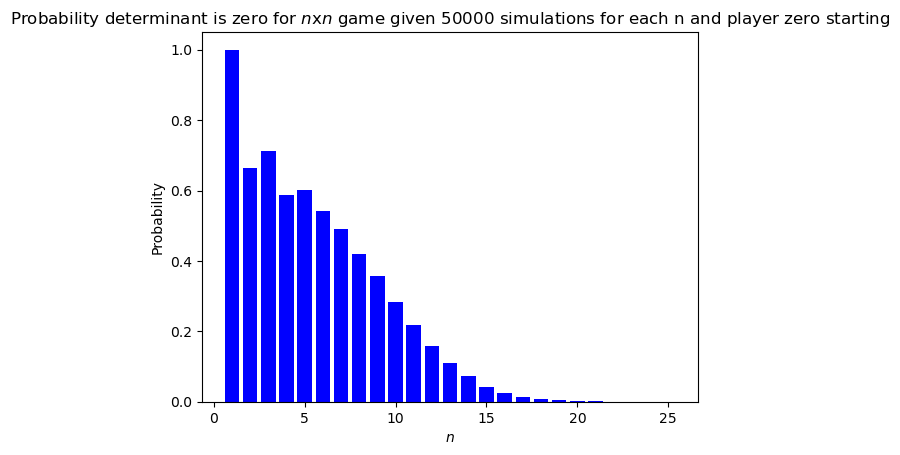

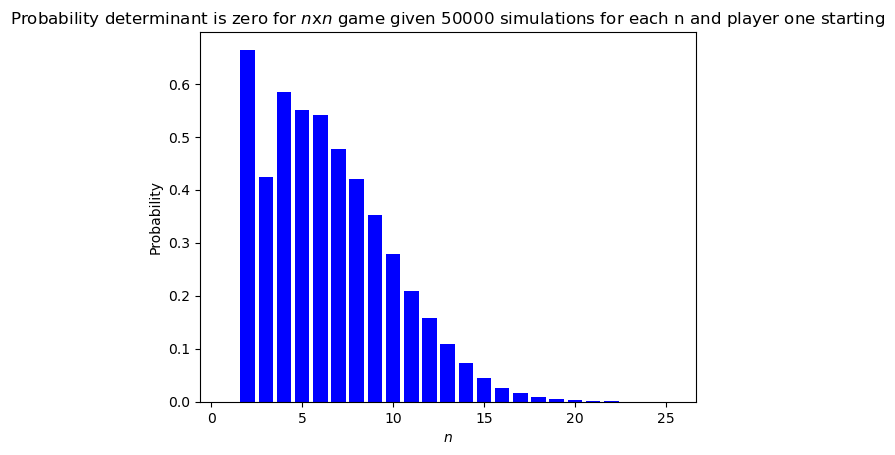

In [31]:
# Create bar charts
plt.bar(x, zero_starter_results, color='b')
plt.xlabel('$n$')
plt.ylabel('Probability')
plt.title(f'Probability determinant is zero for $n$x$n$ game given {trials} simulations for each n and player zero starting')
plt.show()

plt.bar(x, one_starter_results, color='b')
plt.xlabel('$n$')
plt.ylabel('Probability')
plt.title(f'Probability determinant is zero for $n$x$n$ game given {trials} simulations for each n and player one starting')
plt.show()